In [1]:
#I,mporting necessary package and Libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
yf.pdr_override()

In [2]:
# Download historical data for SPY from Yahoo Finance. Wr are getting UCOBANK stock prices
df = yf.download('UCOBANK.NS', start='2005-01-01', end='2023-10-27')

# Split data into training (2010-2020) and validation (2020-2023) sets
training_data = df['Adj Close']['2005-01-01':'2020-12-31']
validation_data = df['Adj Close']['2021-01-01':'2023-10-27']

# Use 'Adj Close' prices as the stock price for training
training_set = training_data.values.reshape(-1, 1)
validation_set = validation_data.values.reshape(-1, 1)

[*********************100%%**********************]  1 of 1 completed


In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,37.500000,39.200001,35.650002,37.349998,27.381323,18209088
2005-01-04,37.450001,37.650002,35.700001,36.599998,26.831499,6957182
2005-01-05,38.000000,38.500000,30.100000,34.299999,25.145370,15501385
2005-01-06,35.200001,36.650002,32.000000,33.849998,24.815468,14846897
2005-01-07,34.000000,36.200001,34.000000,35.299999,25.878469,7495797


In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-19,39.799999,39.799999,38.900002,39.599998,39.599998,20569422
2023-10-20,39.599998,40.200001,38.200001,38.400002,38.400002,22724052
2023-10-23,38.549999,38.950001,35.200001,35.750000,35.750000,37503929
2023-10-25,36.200001,37.700001,35.099998,36.650002,36.650002,38360410
2023-10-26,36.650002,36.849998,34.750000,36.500000,36.500000,31166726


In [8]:
df.shape

(4645, 6)

In [9]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4.645000e+03
mean,42.609666,43.444898,41.649731,42.477320,38.352270,4.336402e+06
std,28.018451,28.559065,27.365349,27.966267,24.904657,1.429860e+07
min,8.650000,9.000000,8.400000,8.550000,8.550000,0.000000e+00
25%,20.049999,20.500000,19.500000,19.950001,18.318485,8.126490e+05
50%,33.349998,33.900002,32.450001,33.150002,31.049999,1.715239e+06
75%,61.900002,63.150002,60.000000,61.400002,56.320156,3.504774e+06
max,151.300003,152.399994,143.000000,150.949997,128.399323,3.963898e+08


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4645 entries, 2005-01-03 to 2023-10-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4645 non-null   float64
 1   High       4645 non-null   float64
 2   Low        4645 non-null   float64
 3   Close      4645 non-null   float64
 4   Adj Close  4645 non-null   float64
 5   Volume     4645 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 383.1 KB


<Axes: xlabel='Date'>

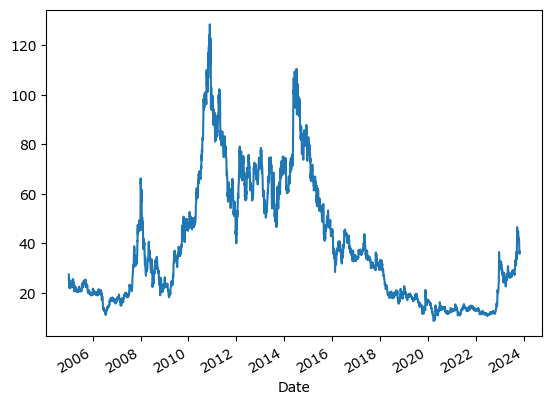

In [12]:
# Visualize the data
df['Adj Close'].plot()

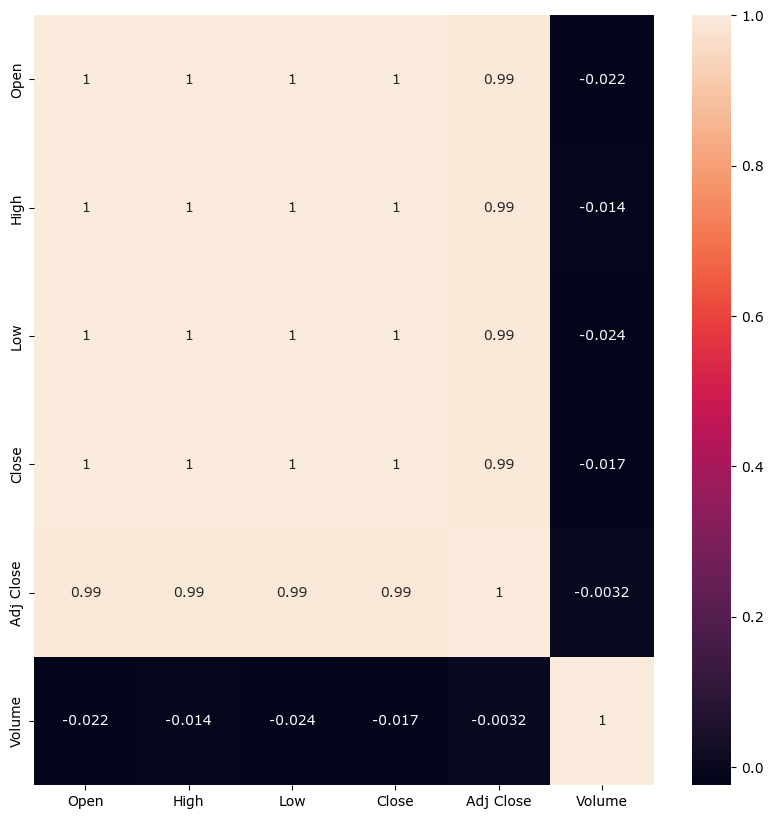

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [14]:
# Feature scaling using MinMaxScaler
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import matplotlib.dates as mdates

sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
validation_set_scaled = sc.transform(validation_set)
# Creating input sequences for training
def create_sequences(data, seq_length=60):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(training_set_scaled)
X_validation, y_validation = create_sequences(validation_set_scaled)

# Reshape inputs for LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_validation = np.reshape(X_validation, (X_validation.shape[0], X_validation.shape[1], 1))


In [15]:
# Building the LSTM Model
model = keras.Sequential()
model.add(keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50, return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50, return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=1))

# Compiling the LSTM Model
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [17]:
# Training the Model and store history
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_validation, y_validation))

Epoch 1/50
61/61 [==============================] - 14s 119ms/step - loss: 0.0096 - val_loss: 5.8717e-04
Epoch 2/50
61/61 [==============================] - 5s 90ms/step - loss: 0.0027 - val_loss: 4.9226e-04
Epoch 3/50
61/61 [==============================] - 5s 89ms/step - loss: 0.0025 - val_loss: 4.2882e-04
Epoch 4/50
61/61 [==============================] - 6s 93ms/step - loss: 0.0024 - val_loss: 4.3378e-04
Epoch 5/50
61/61 [==============================] - 5s 88ms/step - loss: 0.0021 - val_loss: 5.6584e-04
Epoch 6/50
61/61 [==============================] - 6s 89ms/step - loss: 0.0019 - val_loss: 2.9342e-04
Epoch 7/50
61/61 [==============================] - 6s 91ms/step - loss: 0.0018 - val_loss: 2.6617e-04
Epoch 8/50
61/61 [==============================] - 5s 89ms/step - loss: 0.0021 - val_loss: 2.9099e-04
Epoch 9/50
61/61 [==============================] - 6s 93ms/step - loss: 0.0017 - val_loss: 3.5616e-04
Epoch 10/50
61/61 [==============================] - 6s 90ms/step - los

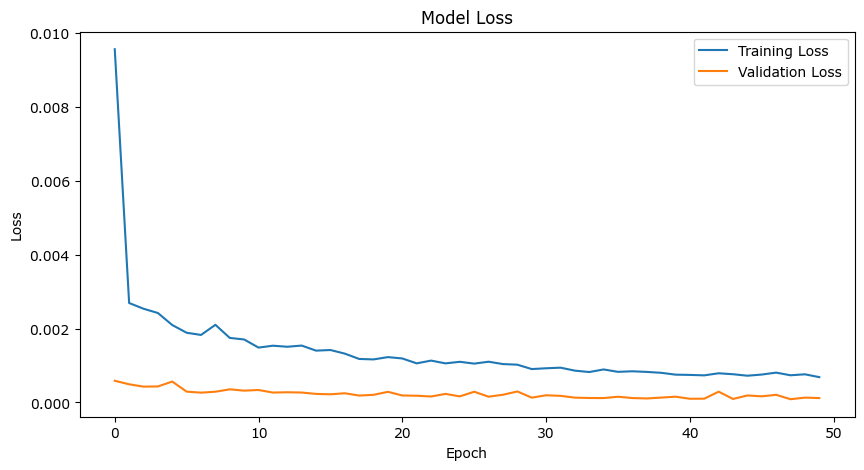

In [18]:
# Plot loss and accuracy during training
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
spy_test = yf.download('UCOBANK.NS', start='2023-01-01', end='2023-10-25')

[*********************100%%**********************]  1 of 1 completed


In [20]:
seq_length=60
# Initialize a sequence with historical data
current_sequence = spy_test[-seq_length:]['Adj Close']
current_sequence =current_sequence.values.reshape(-1,1)
current_sequence = sc.transform(current_sequence)
current_sequence =np.array(current_sequence)

future_predictions = []
prediction_horizon=100
# Make predictions for the specified prediction horizon
for _ in range(prediction_horizon):
    # Reshape current_sequence to match the model input shape
    current_sequence = np.reshape(current_sequence, (1, current_sequence.shape[0], 1))
    
    # Use the model to predict the next time step
    next_prediction = model.predict(current_sequence)
    
    # Append the prediction to the future_predictions list
    future_predictions.append(next_prediction[0, 0])
    
    current_sequence = np.squeeze(current_sequence)
    # Update the current_sequence by removing the oldest value and adding the new prediction
    current_sequence = np.append(current_sequence[1:], next_prediction[0, 0])  # Add the

# future_predictions now contains predicted stock prices for the specified prediction horizon

future_predictions=np.asarray(future_predictions)
future_predictions=future_predictions.reshape(-1,1)
future_predictions = sc.inverse_transform(future_predictions)

1/1 [==============================] - 0s 22ms/step


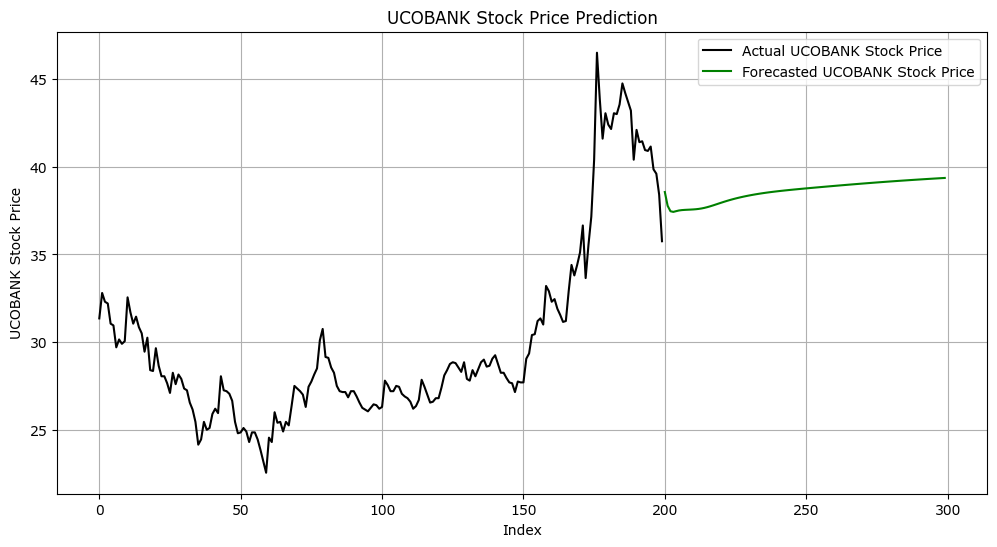

In [22]:
import matplotlib.pyplot as plt

# Assuming you have historical data for the past and predicted data for the next 90 data points
# Define historical data and predicted prices (adjust these as needed)
historical_data = spy_test['Adj Close'].values.reshape(-1, 1)
predicted_prices = future_predictions  # Take the first 90 predicted prices

# Create indices for historical and predicted data
historical_indices = range(len(historical_data))
predicted_indices = range(len(historical_data), len(historical_data) + len(predicted_prices))

# Visualize historical and predicted data on the same plot
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(historical_indices, historical_data, color='black', label='Actual UCOBANK Stock Price')

# Plot predicted data
plt.plot(predicted_indices, predicted_prices, color='green', label='Forecasted UCOBANK Stock Price')

plt.title('UCOBANK Stock Price Prediction')
plt.xlabel('Index')
plt.ylabel('UCOBANK Stock Price')
plt.legend()
plt.grid(True)  # Add gridlines for better visualization
plt.show()